In [1]:
from google.colab import files
uploaded = files.upload()

Saving breast cancer.zip to breast cancer.zip


In [3]:
import zipfile

with zipfile.ZipFile("breast cancer.zip", 'r') as zip_ref:
    zip_ref.extractall("data/")   # extracts into folder "data"

In [4]:
import os
os.listdir("data/")

['data.csv']

In [12]:
# Part 1: Import libraries and extract ZIP file
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Ensure the ZIP file is uploaded in Colab Files panel before running this
zip_filename = 'breast cancer.zip'

if not os.path.exists(zip_filename):
    raise FileNotFoundError(f"'{zip_filename}' not found! Please upload it via Colab's Files panel.")

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()
print(f"✅ Extracted '{zip_filename}' successfully!")


✅ Extracted 'breast cancer.zip' successfully!


Import Libraries and Extract ZIP File

In [13]:
# Part 2: Load and clean the dataset
data_file = 'data.csv'

if not os.path.exists(data_file):
    raise FileNotFoundError(f"'{data_file}' not found! Check the extracted files.")

df = pd.read_csv(data_file)

# Drop 'id' and unnamed columns
df.drop(['id'], axis=1, inplace=True, errors='ignore')
df.drop([col for col in df.columns if 'Unnamed' in col], axis=1, inplace=True, errors='ignore')

# Map diagnosis to 0 (benign) and 1 (malignant)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

print("✅ Data loaded and cleaned. Here is a preview:")
print(df.head())


✅ Data loaded and cleaned. Here is a preview:
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \

Load and Clean Dataset

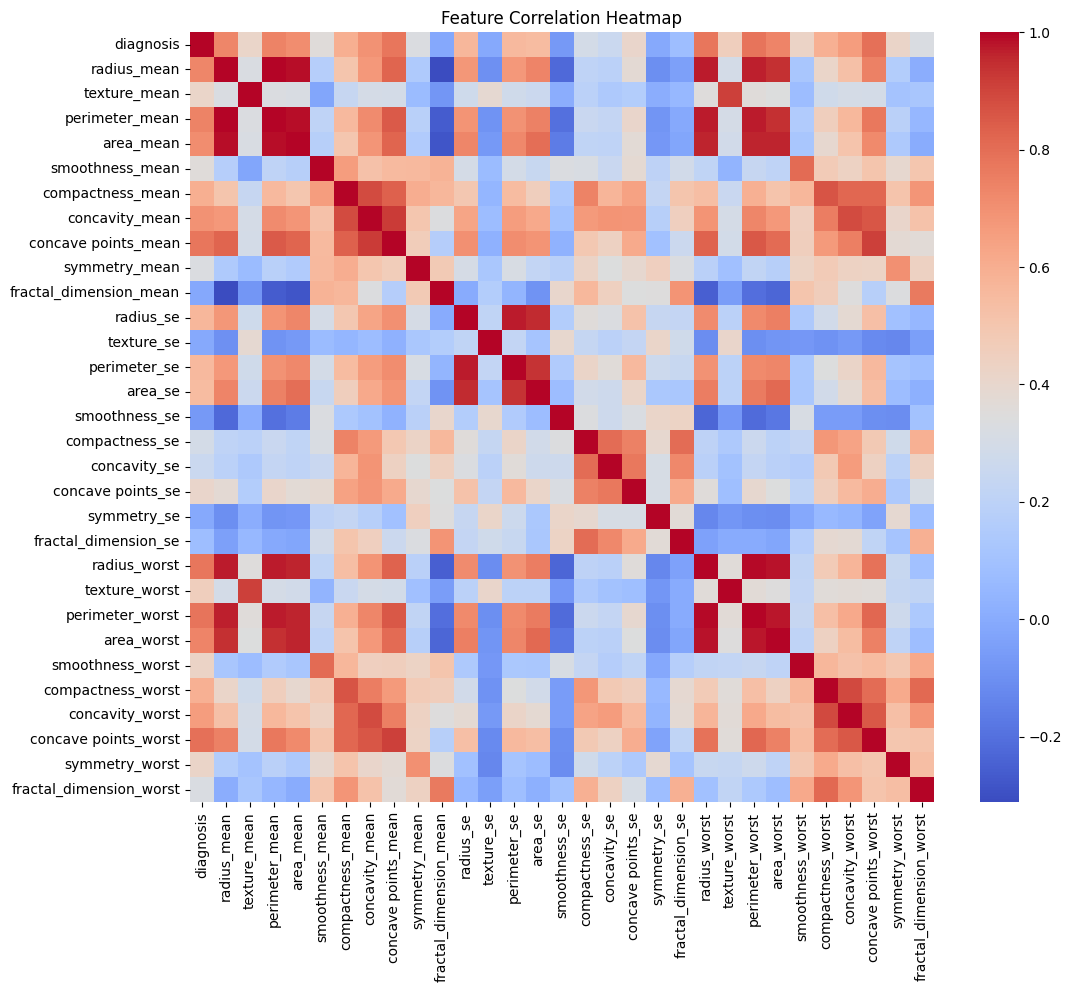

In [14]:
# Part 3: Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


This code creates a heatmap to visualize the correlations between features in the dataset. The colors indicate the strength and direction of the relationships, with red and blue showing positive and negative correlations. This helps identify which features are closely related for better data analysis.This code creates a heatmap to visualize the correlations between features in the dataset. The colors indicate the strength and direction of the relationships, with red and blue showing positive and negative correlations. This helps identify which features are closely related for better data analysis.

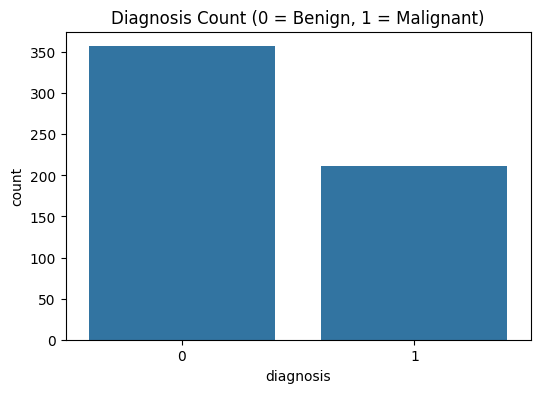

In [16]:
# Part 3a: Distribution of Diagnosis (Target Variable)
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Count (0 = Benign, 1 = Malignant)')
plt.show()


Shows how many samples are benign (0) and malignant (1), giving an overview of class distribution.

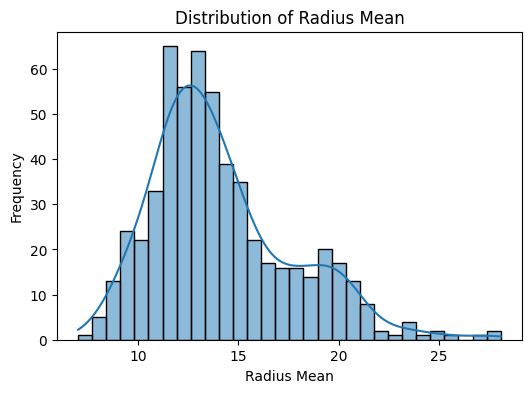

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df['radius_mean'], bins=30, kde=True)
plt.title("Distribution of Radius Mean")
plt.xlabel("Radius Mean")
plt.ylabel("Frequency")
plt.show()


This plot shows the distribution of the radius_mean values in the dataset. The histogram displays the frequency of different radius sizes, while the KDE curve smooths the distribution to highlight its overall shape

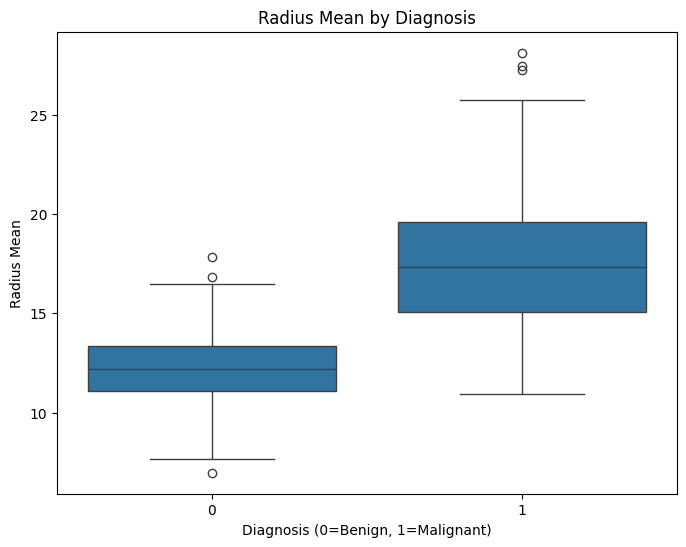

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x="diagnosis", y="radius_mean", data=df)
plt.title("Radius Mean by Diagnosis")
plt.xlabel("Diagnosis (0=Benign, 1=Malignant)")
plt.ylabel("Radius Mean")
plt.show()


This boxplot compares the distribution of radius_mean between benign and malignant diagnoses. It highlights differences in the median and spread of radius sizes for each diagnosis category.

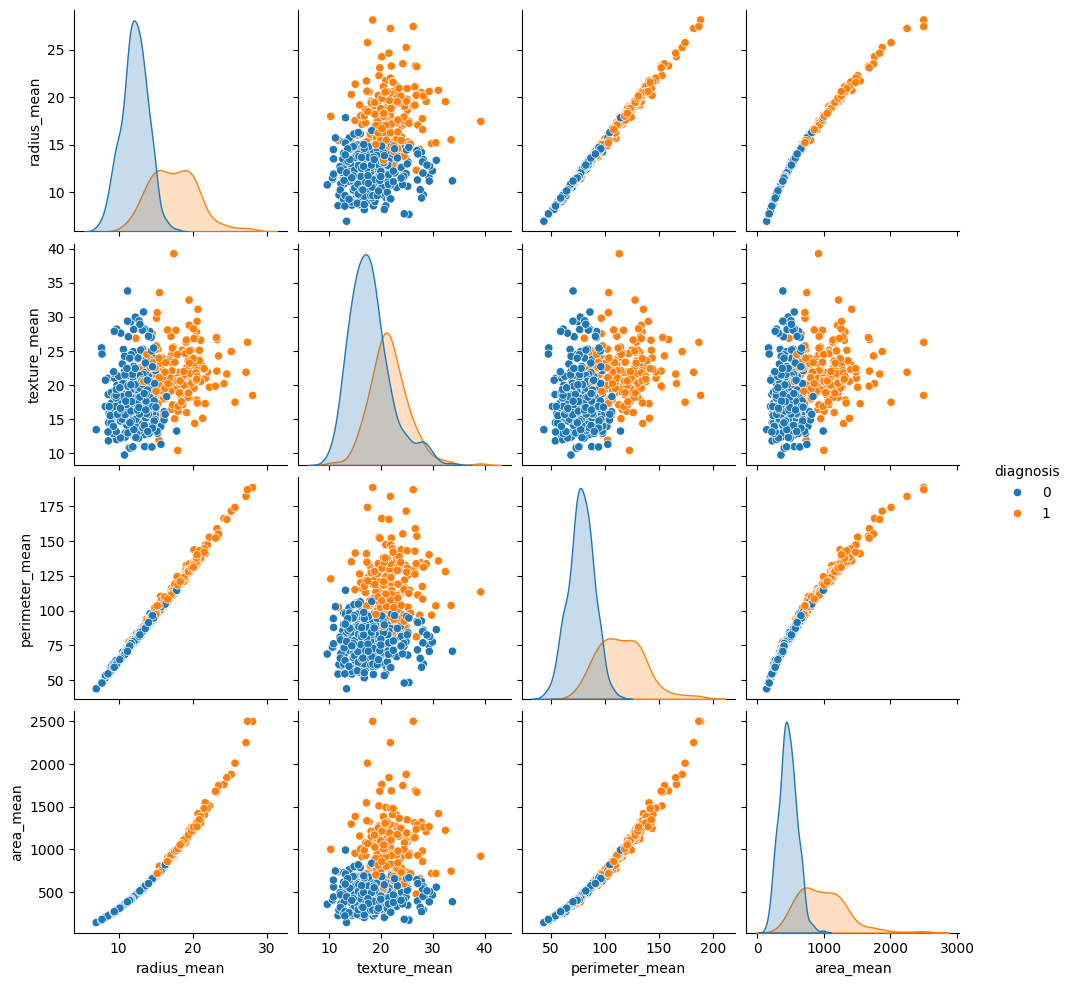

In [19]:
sns.pairplot(df[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean']],
             hue="diagnosis", diag_kind="kde")
plt.show()


This pairplot visualizes relationships and distributions among key features, separated by diagnosis type. It helps identify patterns and differences between benign and malignant cases across multiple variables.


In [15]:
# Part 4: Prepare features and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


This code prepares the dataset by separating features and labels, then splits it into training and testing sets. It also scales the feature values to standardize them for better model performance.



In [20]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


We use **Logistic Regression** as our classifier to distinguish between malignant (1) and benign (0) tumors.  
The model is trained on the scaled training dataset and then used to predict outcomes on the test set.  


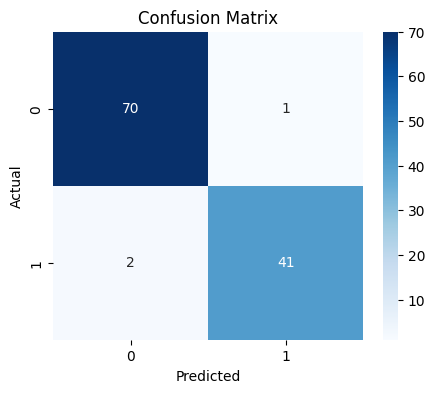

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


The **confusion matrix** shows how many predictions were correct vs incorrect.  
The **classification report** gives precision, recall, F1-score, and accuracy for both classes.  




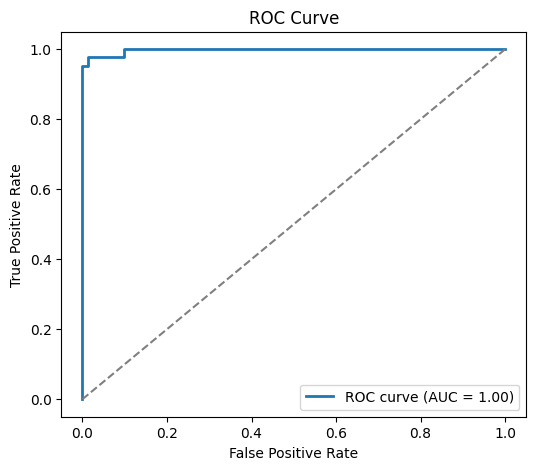

In [22]:
# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", lw=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


The **ROC curve** shows the trade-off between sensitivity (True Positive Rate) and specificity (False Positive Rate).  
The **AUC value** summarizes model performance — higher values (close to 1) indicate better classification ability.  


Conclusion
The Logistic Regression model performs very well in distinguishing between malignant and benign tumors.
With high accuracy and AUC, it proves effective for early breast cancer detection and diagnosis support.
